# Personal Key Indicators of Heart Disease

**I built models to predict HeartDisease and at the same time visualized and explained the data.**

**With regard to model building, I used three methods, RandomForest, LightBGM and NeuralNetwork with a test set score above 93.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv('D:/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Explanation of column name

**Stroke** (Ever told) (you had) a stroke?　

**PhysicalHealth** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 

**MentalHealth** Thinking about your mental health, for how many days during the past 30 days was your mental health not good? 

**DiffWalking** Do you have serious difficulty walking or climbing stairs

**Diabetic** (Ever told) (you had) diabetes?　

**PhysicalActivity** Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

**GenHealth** Would you say that in general your health is...

**Asthma** (Ever told) (you had) asthma?　

**Kidney Disease** Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?　

In [5]:
# oe = OrdinalEncoder()
# encoded = oe.fit_transform(df[['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','GenHealth','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']].values)

# df[['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','GenHealth','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']] = encoded
# df.head()

In [6]:
df['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['Smoking'].replace({'No':0,'Yes':1}, inplace=True)

df['AlcoholDrinking'].replace({'No':0,'Yes':1}, inplace=True)

df['Stroke'].replace({'No':0,'Yes':1}, inplace=True)

df['DiffWalking'].replace({'No':0,'Yes':1}, inplace=True)

df['Diabetic'].replace({'No':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1,'Yes':1}, inplace=True)

df['PhysicalActivity'].replace({'No':0,'Yes':1}, inplace=True)

df['Asthma'].replace({'No':0,'Yes':1}, inplace=True)

df['KidneyDisease'].replace({'No':0,'Yes':1}, inplace=True)

df['SkinCancer'].replace({'No':0,'Yes':1}, inplace=True)

df['Sex'].replace({'Male':0,'Female':1}, inplace=True)

df['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

df['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

df['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [7]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,6.514536,0.540897,0.135590,0.775362,1.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.192394,0.342353,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [8]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0


In [11]:
train, test = train_test_split(df,stratify=df['HeartDisease'],test_size=.2,random_state=0)

In [12]:
print("train.shape : {}".format(train.shape))
print("test.shape : {}".format(test.shape))

train.shape : (255836, 18)
test.shape : (63959, 18)


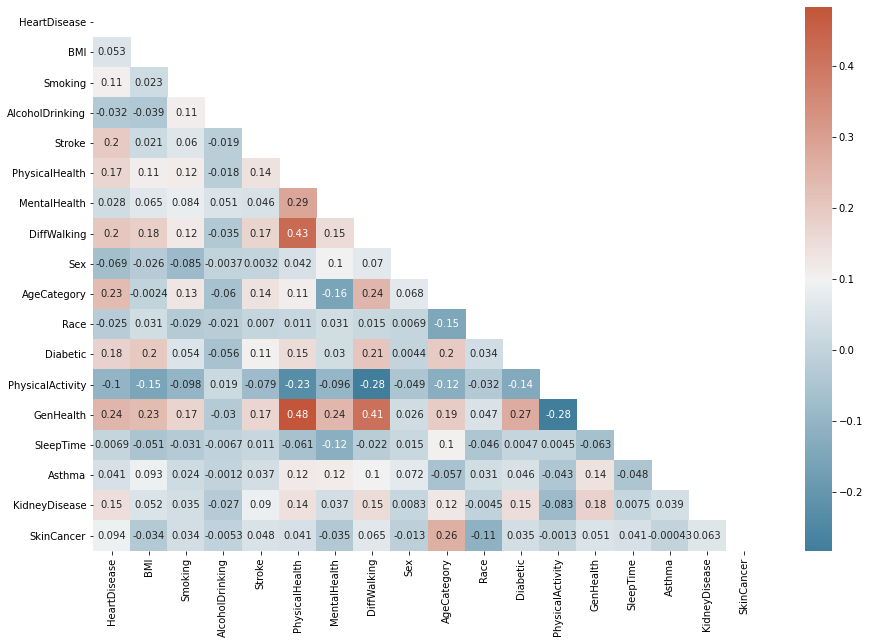

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig1 = sns.heatmap(train.corr(), mask=mask, cmap=cmap, annot=True)
plt.show()
plt.draw()
fig1.savefig('tessstttyyy.png', dpi=100)

In [9]:
train_corr = train.corr()
train_corr[(train_corr > 0.2) & (train_corr < 1.0)].stack()

HeartDisease    DiffWalking       0.203615
                AgeCategory       0.233009
                GenHealth         0.243702
BMI             GenHealth         0.232758
PhysicalHealth  MentalHealth      0.287765
                DiffWalking       0.427359
                GenHealth         0.482381
MentalHealth    PhysicalHealth    0.287765
                GenHealth         0.242048
DiffWalking     HeartDisease      0.203615
                PhysicalHealth    0.427359
                AgeCategory       0.244766
                Diabetic          0.210130
                GenHealth         0.413318
AgeCategory     HeartDisease      0.233009
                DiffWalking       0.244766
                SkinCancer        0.263627
Diabetic        DiffWalking       0.210130
                GenHealth         0.271059
GenHealth       HeartDisease      0.243702
                BMI               0.232758
                PhysicalHealth    0.482381
                MentalHealth      0.242048
           

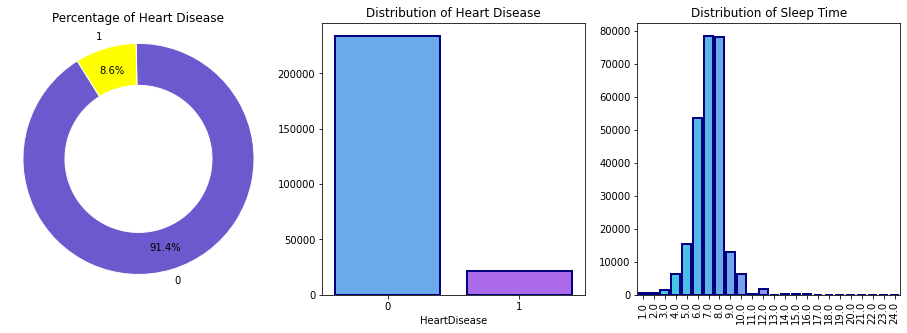

In [10]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
x = train['HeartDisease'].value_counts()
colors = ["slateblue", "yellow"]
plt.pie(x.values, startangle=122, labels=[0,1], wedgeprops={"edgecolor":"white", "width":0.4}, radius=1.1, colors=colors, autopct="%1.1f%%", pctdistance=0.8)
plt.title('Percentage of Heart Disease')
plt.subplot(132)
sns.countplot(train['HeartDisease'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.title('Distribution of Heart Disease')
plt.subplot(133)
sns.countplot(train['SleepTime'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Sleep Time')
plt.show()

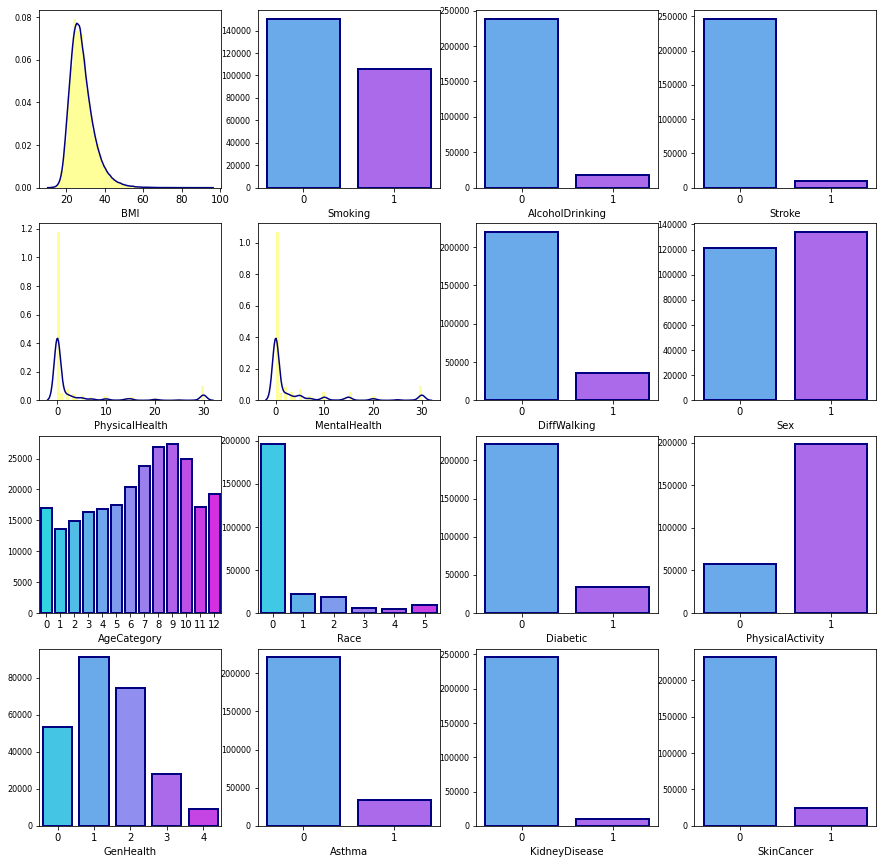

In [11]:
plt.subplots(4,4,figsize=(15,15))
plt.subplot(441)
sns.distplot(train['BMI'], color='yellow', kde=True, kde_kws={'color':'navy'})
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(442)
x = train['Smoking'].value_counts()
sns.countplot(train['Smoking'],palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(443)
sns.countplot(train['AlcoholDrinking'],palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(444)
sns.countplot(train['Stroke'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(445)
sns.distplot(train['PhysicalHealth'], color='yellow', kde=True, kde_kws={'color':'navy'})
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(446)
sns.distplot(train['MentalHealth'], color='yellow', kde=True, kde_kws={'color':'navy'})
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(447)
sns.countplot(train['DiffWalking'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(448)
sns.countplot(train['Sex'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,9)
sns.countplot(train['AgeCategory'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,10)
sns.countplot(train['Race'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,11)
sns.countplot(train['Diabetic'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,12)
sns.countplot(train['PhysicalActivity'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,13)
sns.countplot(train['GenHealth'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,14)
sns.countplot(train['Asthma'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,15)
sns.countplot(train['KidneyDisease'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,16)
sns.countplot(train['SkinCancer'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.show()

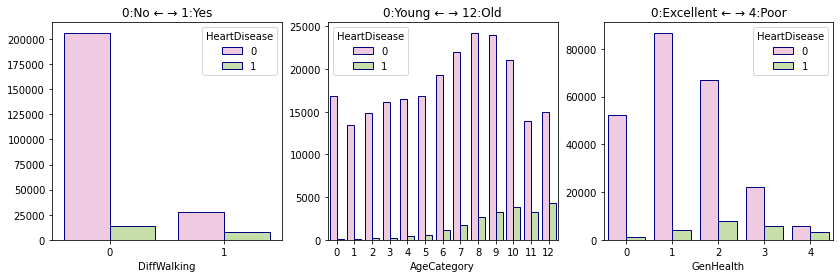

In [12]:
plt.subplots(1,3,figsize=(14,4))

plt.subplot(1,3,1)
sns.countplot(train['DiffWalking'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:No ← → 1:Yes')
plt.ylabel('')
plt.subplot(1,3,2)
sns.countplot(train['AgeCategory'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:Young ← → 12:Old')
plt.ylabel('')
plt.subplot(1,3,3)
sns.countplot(train['GenHealth'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:Excellent ← → 4:Poor')
plt.ylabel('')
plt.show()

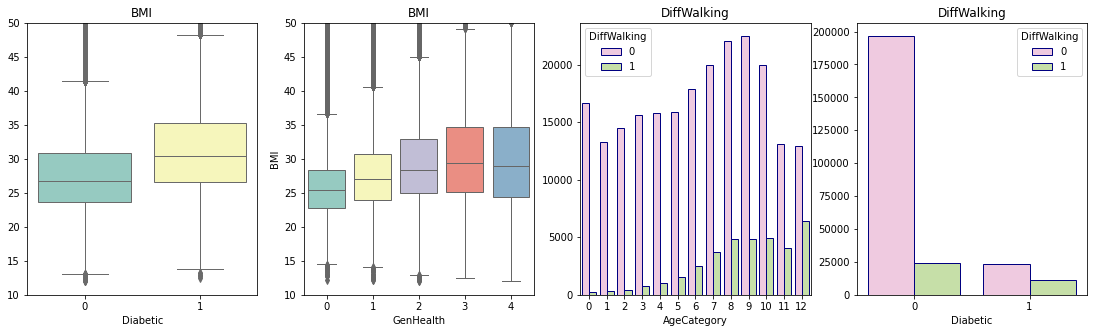

In [13]:
plt.subplots(1,4,figsize=(19,5))
plt.subplot(1,4,1)
sns.boxplot(x=train['Diabetic'],y=train['BMI'],linewidth=1,palette='Set3')
plt.ylim(ymin=10,ymax=50)
plt.title('BMI')
plt.ylabel('')
plt.subplot(1,4,2)
sns.boxplot(x=train['GenHealth'],y=train['BMI'],linewidth=1,palette='Set3')
plt.title('BMI')
plt.ylim(ymin=10,ymax=50)
plt.subplot(1,4,3)
sns.countplot(train['AgeCategory'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')
plt.subplot(1,4,4)
sns.countplot(train['Diabetic'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')

plt.show()

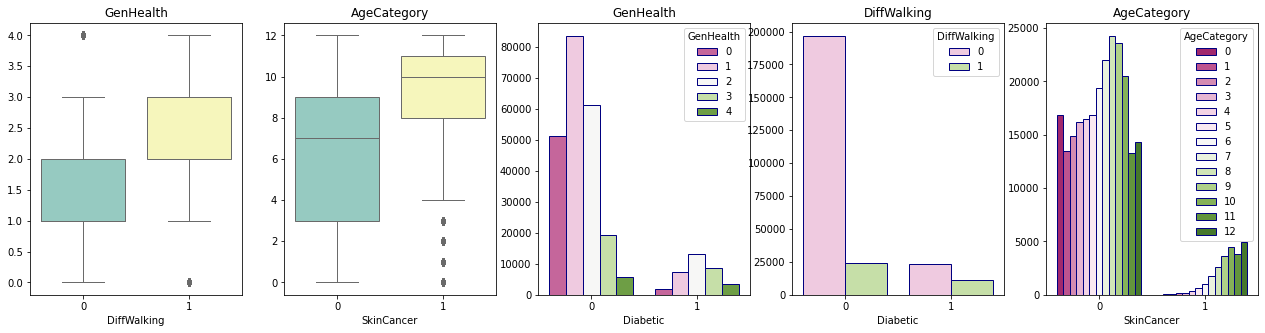

In [14]:
plt.subplots(1,5,figsize=(22,5))
plt.subplot(1,5,1)
sns.boxplot(x=train['DiffWalking'],y=train['GenHealth'],linewidth=1,palette='Set3')
plt.title('GenHealth')
plt.ylabel('')
plt.subplot(1,5,2)
sns.boxplot(x=train['SkinCancer'],y=train['AgeCategory'],linewidth=1,palette='Set3')
plt.ylabel('')
plt.title('AgeCategory')
plt.subplot(1,5,3)
sns.countplot(train['Diabetic'], hue=train['GenHealth'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('GenHealth')
plt.subplot(1,5,4)
sns.countplot(train['Diabetic'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')
plt.subplot(1,5,5)
sns.countplot(train['SkinCancer'], hue=train['AgeCategory'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('AgeCategory')

plt.show()

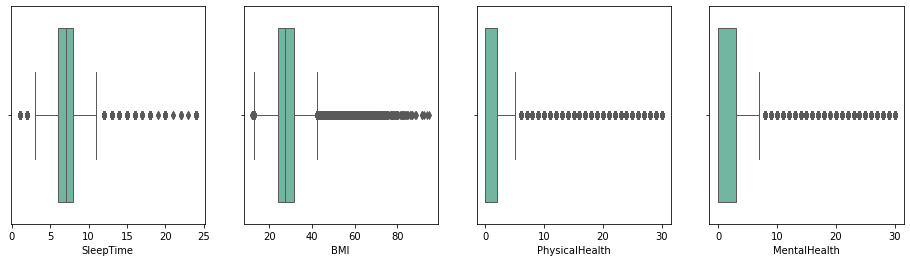

In [15]:
plt.subplots(1,4,figsize=(16,4))

plt.subplot(141)
sns.boxplot(train['SleepTime'],linewidth=1,palette='Set2')
plt.subplot(142)
sns.boxplot(train['BMI'],linewidth=1,palette='Set2')
plt.subplot(143)
sns.boxplot(train['PhysicalHealth'],linewidth=1,palette='Set2')
plt.subplot(144)
sns.boxplot(train['MentalHealth'],linewidth=1,palette='Set2')
plt.show()

In [16]:
def outlier(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 3.0)]
    
    return df

In [17]:
def outlier_2(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 1.9)]
    
    return df

In [18]:
def outlier_3(df, columns=None):
    if columns == None:
        columns = df.columns
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        
        border = np.abs(df[col] - mean) / std
        
        df = df[(border < 1.2)]
    
    return df

In [19]:
print(train.shape)
train = outlier(train, ['SleepTime'])
print(train.shape)
train = outlier_2(train, ['BMI'])
print(train.shape)
train = outlier_3(train, ['PhysicalHealth'])
print(train.shape)
train = outlier_3(train, ['MentalHealth'])
print(train.shape)

(255836, 18)
(252209, 18)
(239853, 18)
(216503, 18)
(196479, 18)


In [20]:
print(test.shape)
test = outlier(test, ['SleepTime'])
print(test.shape)
test = outlier_2(test, ['BMI'])
print(test.shape)
test = outlier_3(test, ['PhysicalHealth'])
print(test.shape)
test = outlier_3(test, ['MentalHealth'])
print(test.shape)

(63959, 18)
(63043, 18)
(59793, 18)
(54007, 18)
(48968, 18)


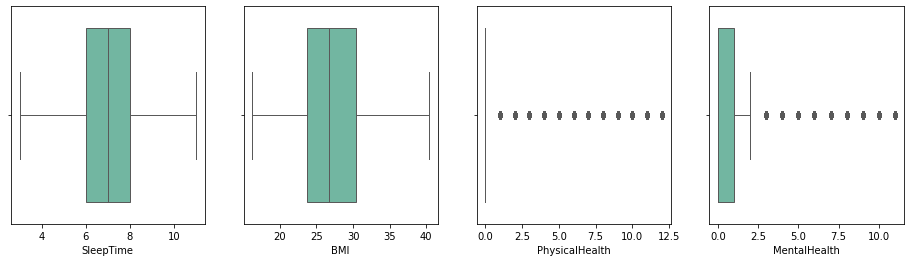

In [21]:
plt.subplots(1,4,figsize=(16,4))

plt.subplot(141)
sns.boxplot(train['SleepTime'],linewidth=1,palette='Set2')
plt.subplot(142)
sns.boxplot(train['BMI'],linewidth=1,palette='Set2')
plt.subplot(143)
sns.boxplot(train['PhysicalHealth'],linewidth=1,palette='Set2')
plt.subplot(144)
sns.boxplot(train['MentalHealth'],linewidth=1,palette='Set2')
plt.show()

In [22]:
train['Physical_MentalHealth'] = train['PhysicalHealth'] + train['MentalHealth']
test['Physical_MentalHealth'] = test['PhysicalHealth'] + test['MentalHealth']

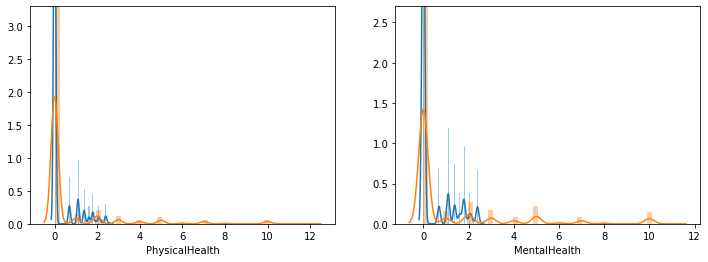

In [23]:
train['PhysicalHealth_log'] = np.log1p(train['PhysicalHealth'])   #Take the logarithm after adding 1
train['MentalHealth_log'] = np.log1p(train['MentalHealth'])

plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
sns.distplot(train['PhysicalHealth_log'])
sns.distplot(train['PhysicalHealth'])
plt.ylim(ymin=0,ymax=3.3)
plt.ylabel('')

plt.subplot(122)
sns.distplot(train['MentalHealth_log'])
sns.distplot(train['MentalHealth'])
plt.ylim(ymin=0,ymax=2.7)
plt.ylabel('')
plt.show()

In [24]:
test['PhysicalHealth_log'] = np.log1p(test['PhysicalHealth'])
test['MentalHealth_log'] = np.log1p(test['MentalHealth'])

In [25]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Physical_MentalHealth,PhysicalHealth_log,MentalHealth_log
131927,1,30.13,1,0,0,0.0,0.0,0,0,12,...,1,0,3,7.0,0,0,0,0.0,0.0,0.0
292375,0,35.51,0,0,1,0.0,0.0,0,1,4,...,0,1,2,7.0,1,0,0,0.0,0.0,0.0
292538,0,24.89,0,1,0,0.0,0.0,0,1,4,...,0,1,1,7.0,0,0,0,0.0,0.0,0.0
100928,0,26.50,1,0,0,0.0,0.0,0,0,5,...,0,1,1,7.0,0,0,0,0.0,0.0,0.0
74077,0,21.97,0,0,0,0.0,0.0,0,1,7,...,0,1,2,8.0,0,0,0,0.0,0.0,0.0


In [26]:
y_train = train['HeartDisease']
X_train = train.drop('HeartDisease',axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=train['HeartDisease'], test_size=.2, random_state=1205)

y_test = test['HeartDisease']
X_test = test.drop('HeartDisease', axis=1)

In [27]:
X_train.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Physical_MentalHealth,PhysicalHealth_log,MentalHealth_log
302267,25.75,0,0,0,0.0,0.0,0,1,4,0,0,1,2,8.0,0,0,0,0.0,0.000000,0.0
192452,30.68,1,0,0,10.0,0.0,0,0,5,1,1,0,2,9.0,0,1,0,10.0,2.397895,0.0
36019,31.47,0,0,0,0.0,0.0,0,1,2,0,0,1,1,7.0,1,0,0,0.0,0.000000,0.0
302807,23.75,0,0,0,5.0,0.0,0,0,10,0,0,1,2,7.0,0,1,1,5.0,1.791759,0.0
46455,23.49,0,0,0,0.0,0.0,0,0,12,0,0,1,1,8.0,0,0,0,0.0,0.000000,0.0


# Random Forest

In [28]:
#grid search

import time
t1 = time.time()

parameters = {  
    'n_estimators': [24,28,32],   
    'max_features': ('sqrt','log2','auto'), 
    'max_depth':    (5,10,15),     
    'criterion'   : ['gini', 'entropy'],
}
model = RandomForestClassifier()
gridsearch = GridSearchCV(estimator = model,     
                          param_grid = parameters, 
                          cv = 2,
                          n_jobs = -1,
                          return_train_score = False,
                          scoring = "accuracy"      
                         )
gridsearch.fit(X_train, y_train)

t2 = time.time()

print('Best params: {}'.format(gridsearch.best_params_)) 
print('Best Score: {}'.format(gridsearch.best_score_))
print((t2-t1)/60)

Best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 32}
Best Score: 0.9302087376642513
1.3321358521779378


In [29]:
forest = RandomForestClassifier(n_estimators=28, max_depth=10, max_features='sqrt',criterion='entropy',random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=28, random_state=0)

In [30]:
print(forest.score(X_train,y_train))
print(forest.score(X_valid,y_valid))
print(forest.score(X_test,y_test))

0.9318946705432521
0.930171009771987
0.9300972063388335


# LightBGM

In [31]:
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke','DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease',
       'SkinCancer']
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train,categorical_feature=categorical_features)

In [32]:
t1 = time.time()

model = lgb.LGBMClassifier()

param_grid = {"max_depth": [5,6,7,8],
              "learning_rate" : [0.04,0.0450,0.05],
              "num_leaves": [26,27,30],
              "n_estimators": [109,111,114]
             }

grid_result = GridSearchCV(estimator = model,
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 2,
                           return_train_score = False,
                           n_jobs = -1)

grid_result.fit(X_train,y_train)

t2 = time.time()

print(grid_result.best_estimator_)
print((grid_result.best_params_))
print((t2-t1)/60)

LGBMClassifier(learning_rate=0.04, max_depth=6, n_estimators=109, num_leaves=27)
{'learning_rate': 0.04, 'max_depth': 6, 'n_estimators': 109, 'num_leaves': 27}
2.3446885148684182


In [33]:
params={
    'num_leaves':27,
    'objective':'binary',
    'max_depth':7,
    'learning_rate':.04,
    'n_estimators':109
}
num_round=30000

model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval], num_boost_round=num_round, categorical_feature=categorical_features)

[LightGBM] [Info] Number of positive: 11030, number of negative: 146153
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 157183, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070173 -> initscore=-2.584035
[LightGBM] [Info] Start training from score -2.584035
[1]	training's binary_logloss: 0.249483	valid_1's binary_logloss: 0.249318
[2]	training's binary_logloss: 0.245588	valid_1's binary_logloss: 0.245417
[3]	training's binary_logloss: 0.242149	valid_1's binary_logloss: 0.241939
[4]	training's binary_logloss: 0.23915	valid_1's binary_logloss: 0.238843
[5]	training's binary_logloss: 0.23635	valid_1's binary_logloss: 0.236049
[6]	training's binary_logloss: 0.233851	valid_1's binary_logloss:

In [34]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [35]:
print(np.mean(y_pred == y_test))

0.9303014213363829


# Neural Network   -tensorflow

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [38]:
print(df.shape)
df = outlier(df, ['SleepTime'])
print(df.shape)
df = outlier_2(df, ['BMI'])
print(df.shape)
df = outlier_3(df, ['PhysicalHealth'])
print(df.shape)
df = outlier_3(df, ['MentalHealth'])
print(df.shape)

(319795, 18)
(315252, 18)
(299334, 18)
(270245, 18)
(245238, 18)


In [39]:
df['Physical_MentalHealth'] = df['PhysicalHealth'] + df['MentalHealth']

In [40]:
train, test = train_test_split(df,stratify=df['HeartDisease'],test_size=.2,random_state=0)
y_train = train['HeartDisease']
X_train = train.drop('HeartDisease',axis=1)

y_test = test['HeartDisease']
X_test = test.drop('HeartDisease', axis=1)

In [41]:
one_hot_train = pd.get_dummies(X_train)
one_hot_test = pd.get_dummies(X_test)

In [42]:
y_train.replace({'Yes':1,'No':0}, inplace=True)
y_test.replace({'Yes':1,'No':0}, inplace=True)

In [43]:
one_hot_train.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime',
       'Physical_MentalHealth', 'Smoking_No', 'Smoking_Yes',
       'AlcoholDrinking_No', 'AlcoholDrinking_Yes', 'Stroke_No', 'Stroke_Yes',
       'DiffWalking_No', 'DiffWalking_Yes', 'Sex_Female', 'Sex_Male',
       'AgeCategory_18-24', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_American Indian/Alaskan Native',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'PhysicalActivity_No',
       'PhysicalActivity_Yes', 'GenHealth_Excellent', 'GenHealth_Fair',
       'GenHealth_Good', 'GenHealth_Poor', 'GenHealth_Very good', 'Asthma_No',
      

In [44]:
scaler = StandardScaler()

bmi = one_hot_train['BMI'].values.reshape(-1,1)
one_hot_train['BMI'] = scaler.fit_transform(bmi)

sleep = one_hot_train['SleepTime'].values.reshape(-1,1)
one_hot_train['SleepTime'] = scaler.fit_transform(sleep)


bmi = one_hot_test['BMI'].values.reshape(-1,1)
one_hot_test['BMI'] = scaler.fit_transform(bmi)

sleep = one_hot_test['SleepTime'].values.reshape(-1,1)
one_hot_test['SleepTime'] = scaler.fit_transform(sleep)

In [45]:
one_hot_train['BMI*'] = one_hot_train['BMI'] * one_hot_train['BMI']
one_hot_train['SleepTime*'] = one_hot_train['SleepTime'] * one_hot_train['SleepTime']


one_hot_test['BMI*'] = one_hot_test['BMI'] * one_hot_test['BMI']
one_hot_test['SleepTime*'] = one_hot_test['SleepTime'] * one_hot_test['SleepTime']

In [46]:
one_hot_train['PhysicalHealth_log'] = np.log1p(one_hot_train['PhysicalHealth'])
one_hot_train['MentalHealth_log'] = np.log1p(one_hot_train['MentalHealth'])


one_hot_test['PhysicalHealth_log'] = np.log1p(one_hot_test['PhysicalHealth'])
one_hot_test['MentalHealth_log'] = np.log1p(one_hot_test['MentalHealth'])

In [47]:
one_hot_train['PhysicalHealth_log*'] = one_hot_train['PhysicalHealth_log'] * one_hot_train['PhysicalHealth_log']
one_hot_train['MentalHealth_log*'] = one_hot_train['MentalHealth_log'] * one_hot_train['MentalHealth_log']


one_hot_test['PhysicalHealth_log*'] = one_hot_test['PhysicalHealth_log'] * one_hot_test['PhysicalHealth_log']
one_hot_test['MentalHealth_log*'] = one_hot_test['MentalHealth_log'] * one_hot_test['MentalHealth_log']

In [48]:
one_hot_train.drop(['PhysicalHealth','MentalHealth'],axis=1,inplace=True)


one_hot_test.drop(['PhysicalHealth','MentalHealth'],axis=1,inplace=True)


one_hot_train.head()

,BMI,SleepTime,Physical_MentalHealth,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,...,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,BMI*,SleepTime*,PhysicalHealth_log,MentalHealth_log,PhysicalHealth_log*,MentalHealth_log*
154391,0.352378,-0.131735,2.0,0,1,1,0,1,0,1,...,1,0,1,0,0.124170,0.017354,0.000000,1.098612,0.000000,1.206949
175186,-0.576994,0.751135,0.0,1,0,1,0,1,0,1,...,1,0,0,1,0.332922,0.564204,0.000000,0.000000,0.000000,0.000000
4690,2.273637,0.751135,2.0,1,0,1,0,1,0,1,...,1,0,1,0,5.169424,0.564204,1.098612,0.000000,1.206949,0.000000
136003,-0.618670,0.751135,0.0,1,0,1,0,1,0,1,...,1,0,1,0,0.382753,0.564204,0.000000,0.000000,0.000000,0.000000
135251,0.606601,-0.131735,2.0,1,0,1,0,1,0,1,...,1,0,1,0,0.367965,0.017354,0.000000,1.098612,0.000000,1.206949


In [49]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(one_hot_train.shape[1],)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-04-06 09:04:41.013107: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [50]:
history = model.fit(one_hot_train, y_train, batch_size=512, epochs=20, verbose=1, validation_data=(one_hot_test, y_test))

2022-04-06 09:04:41.751083: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
384/384 [==============================] - 11s 25ms/step - loss: 0.2146 - accuracy: 0.9283 - val_loss: 0.2017 - val_accuracy: 0.9300
Epoch 2/20
384/384 [==============================] - 9s 23ms/step - loss: 0.2029 - accuracy: 0.9301 - val_loss: 0.2001 - val_accuracy: 0.9304
Epoch 3/20
384/384 [==============================] - 9s 23ms/step - loss: 0.2024 - accuracy: 0.9303 - val_loss: 0.2026 - val_accuracy: 0.9304
Epoch 4/20
384/384 [==============================] - 9s 23ms/step - loss: 0.2012 - accuracy: 0.9303 - val_loss: 0.2005 - val_accuracy: 0.9298
Epoch 5/20
384/384 [==============================] - 9s 24ms/step - loss: 0.2004 - accuracy: 0.9304 - val_loss: 0.2004 - val_accuracy: 0.9300
Epoch 6/20
384/384 [==============================] - 9s 22ms/step - loss: 0.1996 - accuracy: 0.9305 - val_loss: 0.1995 - val_accuracy: 0.9301
Epoch 7/20
384/384 [==============================] - 9s 23ms/step - loss: 0.1997 - accuracy: 0.9304 - val_loss: 0.2003 - val_accuracy: 0.930